In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
import cv2
import util

In [3]:
# def binarize(gray_image, thresh_val):

#     gray_copy = gray_image.copy()
#     gray_copy = gaussian_filter(gray_copy, sigma=1)
#     mask = gray_copy > thresh_val
#     binary_image = mask.astype(np.uint8) * 255
#     return binary_image

def label(binary_image):
    """ Function to labeled components in a binary image
        Uses a sequential labeling algorithm

        Args:
        - binary_image: binary image with multiple components to label

        Return:
        - lab_im: binary image with grayscale level as label of component
    """

    _, lab_im = cv2.connectedComponents(binary_image)     
    return lab_im

def process_triangle(img_tri1):
    kernel = np.ones((25,25), dtype = 'uint8')
    image_erode = cv2.erode(img_tri1, kernel)      

    blurred = gaussian_filter(image_erode, sigma=3)
#     plt.imshow(blurred, cmap='gray')
    return blurred

def process_hand(img_tri1):
    kernel = np.ones((25,25), dtype = 'uint8')
    image_dilate = cv2.dilate(img_tri1, kernel)      

    blurred = gaussian_filter(image_dilate, sigma=3)
#     plt.imshow(blurred, cmap='gray')
    return blurred

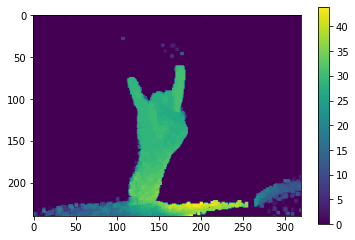

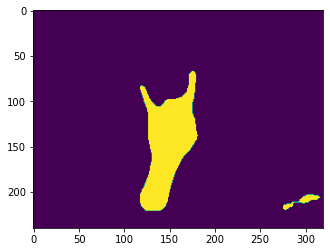

In [153]:
data_dir1 = "data/acquisitions/S1/G6"
im = util.read_depth_map(data_dir1 + "/1-depth.bin")
plt.imshow(im)
blurred_img = util.binarize(im, display=True)
bin_img = blurred_img.copy()
bin_img[blurred_img != 0] = 255
plt.imshow(bin_img)

from scipy import ndimage
experiment = bin_img.copy()
experiment_kernel = np.ones((10,5))
experiment = cv2.erode(experiment, experiment_kernel)
exp_im = experiment.copy()
exp_im[220:,:] = 0
experiment = exp_im
experiment = ndimage.median_filter(exp_im, size=10)


bin_img = experiment
plt.imshow(bin_img)
points_x, points_y = np.where(bin_img == 255)
points = np.c_[ points_y, points_x ]

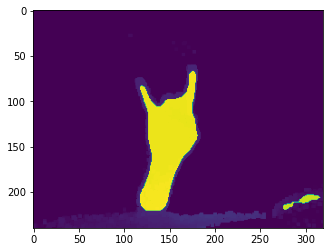

In [154]:
plt.imshow(cv2.addWeighted(bin_img, 0.5, blurred_img, 0.5, 0))

In [155]:
cv2.imwrite("forcindy2_.png", bin_img)

True

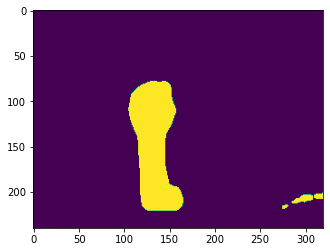

In [151]:
plt.imshow(bin_img)

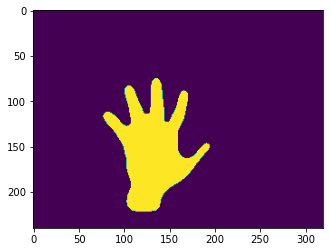

In [123]:
from scipy import ndimage
experiment = bin_img.copy()
experiment = ndimage.median_filter(experiment, size=10)
plt.imshow(experiment)
bin_img = experiment

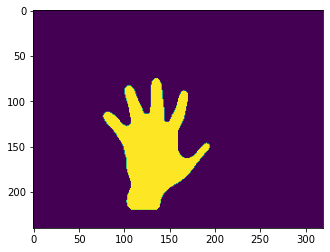

In [124]:
experiment_kernel = np.ones((25,5))
exp_im = experiment.copy()
exp_im[220:,:] = 0


plt.imshow(exp_im)

(240, 320)


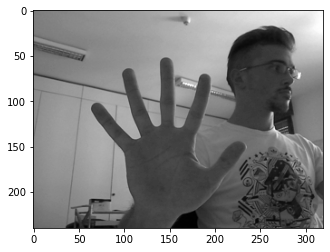

In [139]:
from PIL import Image
h, w = 240, 320
img1 = cv2.imread(data_dir1 + "/1-color.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_image = np.array(Image.fromarray(gray_image).resize((w, h)))
print(gray_image.shape)
plt.imshow(gray_image, cmap="gray")

In [126]:
# img1 = cv2.imread('4.2.jpg', cv2.IMREAD_COLOR)
# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# plt.imshow(img1)
# plt.show()

# gray_image = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# from scipy.ndimage import gaussian_filter
# bin_img = binarize(gray_image, 200)
# blurred_img = process_hand(bin_img)
# plt.imshow(blurred_img, 'gray')
# points_x, points_y = np.where(blurred_img == 255)
# points = np.c_[ points_y, points_x ]


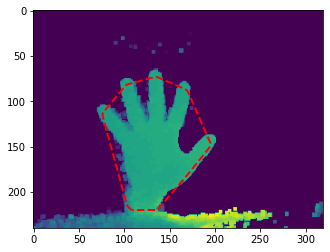

In [127]:
from scipy import spatial
hull = spatial.ConvexHull(points)

plt.imshow(blurred_img)
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(np.array([points[hull.vertices,0][-1], points[hull.vertices,0][0]]), 
         np.array([points[hull.vertices,1][-1], points[hull.vertices,1][0]]), 'r--', lw=2)
plt.show()

outline = np.c_[ points[hull.vertices,0], points[hull.vertices,1] ]
mask = np.zeros((bin_img.shape))
mask = cv2.fillPoly(mask, [np.int32(outline)], (255, 255, 255))

mask = mask != 255

mask_int = mask.astype('int')
out_img = blurred_img.copy()
out_img[mask] = 0
# plt.imshow(mask_int*255 - bin_img)
# plt.colorbar()

triangles = (mask_int*255 - bin_img) == 0
img_tri = blurred_img.copy()
out_tri = (mask_int*255 - bin_img) != 0
img_tri[out_tri] = 255
# plt.imshow(triangles)

kernel = np.ones((10,10), dtype = 'uint8')
image_dilate = cv2.dilate(img_tri, kernel)  
image_erode = cv2.erode(image_dilate, kernel)  

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31, 255], dtype=uint8)

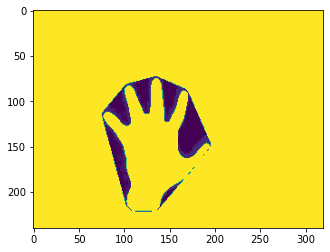

In [128]:
plt.imshow(img_tri)
np.unique(img_tri)

In [129]:
# color_image = image_erode
# # gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY) / 255.0
# rows, cols = gray_image.shape
# plt.figure(figsize=(12,8))
# plt.imshow(gray_image, cmap='gray')
# plt.colorbar()
# print(np.unique(gray_image))

In [130]:
def binarize(gray_image, thresh_val):

    gray_copy = gray_image.copy()
#     gray_copy = gaussian_filter(gray_copy, sigma=1)
    mask = gray_copy > thresh_val
    binary_image = mask.astype(np.uint8) * 255
    return binary_image

def label(binary_image):
    """ Function to labeled components in a binary image
        Uses a sequential labeling algorithm

        Args:
        - binary_image: binary image with multiple components to label

        Return:
        - lab_im: binary image with grayscale level as label of component
    """

    _, lab_im = cv2.connectedComponents(binary_image)     
    return lab_im

In [131]:
# plt.imshow(img_tri*255)
# plt.colorbar()

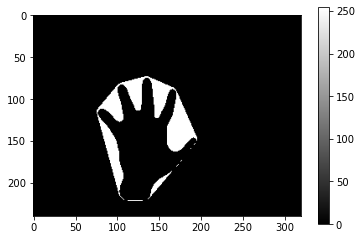

[0 1 2 3 4 5 6 7]


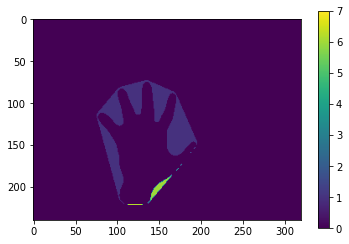

In [132]:
# binary_image = np.ones(gray_image.shape)*255 - binarize(gray_image*255, 254)
binary_image = cv2.bitwise_not(binarize(img_tri, 50))
# binary_image = cv2.bitwise_not(binarize(gray_image, 254))
# binary_image = binary_image.astype('int')
plt.imshow(binary_image,'gray')
plt.colorbar()
plt.show()
labeled_img = label(binary_image)
# print(np.unique(gray_image*255))
print(np.unique(labeled_img))
# plt.imshow(labeled_img)

plt.imshow(labeled_img)
plt.colorbar()

In [87]:
# get better triangle
from scipy.ndimage.filters import gaussian_filter

def process_triangle(img_tri1):
    kernel = np.ones((25,25), dtype = 'uint8')
    image_erode = cv2.erode(img_tri1, kernel)      

    blurred = gaussian_filter(image_erode, sigma=3)
#     plt.imshow(blurred, cmap='gray')
    return blurred

def detect_corners(blurred):
    dst = cv2.cornerHarris(blurred,10,3,0.08)
    dst = cv2.dilate(dst,None)
    r,c = np.where(dst>0.01*dst.max())
    
    c_img = np.zeros(blurred.shape)
    i = 0
    prev_pt = (0,0)
    for ri,ci in zip(r,c):
        if i == 0:
            prev_pt = (ci, ri)
            i += 1
            continue

        c_img = cv2.circle(c_img, (ci, ri), 8, 255, -1)
    #     c_img = cv2.line(c_img, prev_pt, (ci, ri), (255,0,0), 2) 
#         prev_pt = (ci, ri)    
#     binary_image = binarize(c_img, 254)
    # print(binary_image.shape)
#     plt.imshow(c_img.astype('uint'),'gray')
#     plt.show()
    img_points = label(c_img.astype('uint8'))
#     plt.imshow(img_points)
    return img_points

def acute_triangle(img_points):
    prev_pt = np.array([0,0])
    numLabels = np.max(np.unique(img_points))
    print(numLabels)
    temp_img = img_points.copy()
    if (numLabels == 0):
        return False
    for i in range(2, np.max(np.unique(img_points)) + 2):
        if i == 2:
            rows, cols = np.where(img_points == 1)
            center_x = np.mean(cols).astype('int')
            center_y = np.mean(rows).astype('int')   
            prev_pt1 = np.array([center_x, center_y])

            rows, cols = np.where(img_points == 2)
            center_x = np.mean(cols).astype('int')
            center_y = np.mean(rows).astype('int')   
            prev_pt2 = np.array([center_x, center_y])   

        index = (i % np.max(np.unique(img_points))) + 1
        rows, cols = np.where(img_points == index)
        center_x = np.mean(cols).astype('int')
        center_y = np.mean(rows).astype('int')   
        curr_pt = np.array([center_x, center_y])

        ba = curr_pt - prev_pt2
        bc = prev_pt1 - prev_pt2
        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)
        print(np.degrees(angle)    )
        if (np.degrees(angle) > 110):
            return False

        temp_img = cv2.line(temp_img, (prev_pt1[0], prev_pt1[1]), 
                            (prev_pt2[0], prev_pt2[1]), (255,0,0), 2)     
        plt.imshow(temp_img)
        plt.show()
        prev_pt1 = prev_pt2 
        prev_pt2 = curr_pt    
    return True

In [88]:
def count_acute_triangles(labeled_img):
    # iterate through triangles 
    numAcute = 0
    for i in np.unique(labeled_img)[1:]:
    #     print(i)
        img_tri1 = labeled_img.copy()
        img_tri1 = img_tri1 == i
        img_tri1 = img_tri1.astype('uint8')* 255    

        blurred = process_triangle(img_tri1)
        img_points = detect_corners(blurred)
        plt.imshow(img_points)
        plt.show()
        acute = acute_triangle(img_points)
        if (acute):
            numAcute += 1
#     print(numAcute)     
    return numAcute
#     print(obtuse)

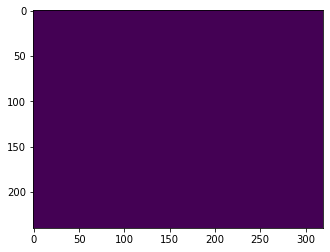

0


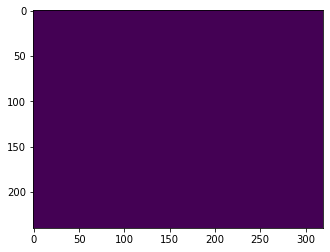

0


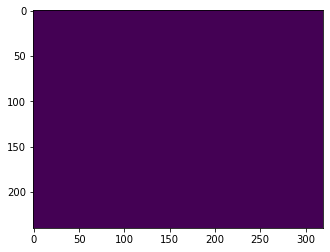

0


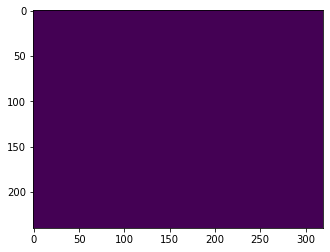

0


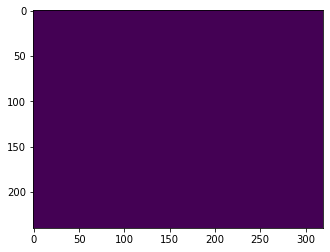

0


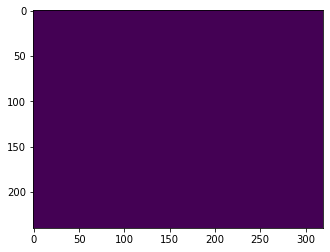

0


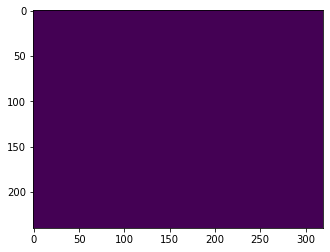

0


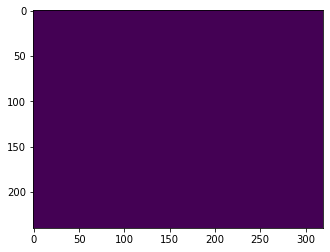

0


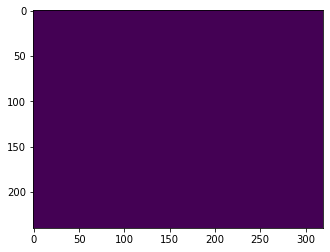

0


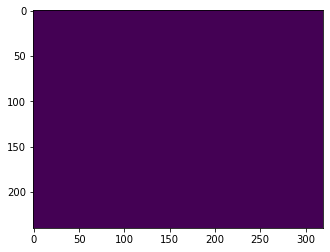

0


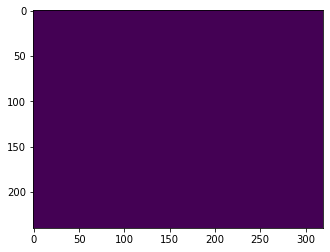

0


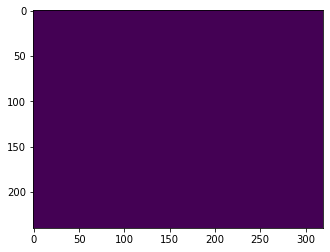

0


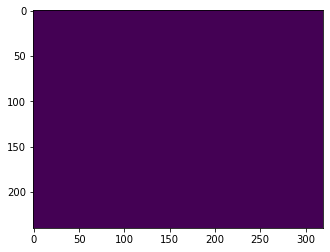

0


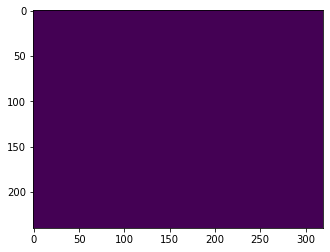

0
fingers count 1


In [89]:
fingers_count = count_acute_triangles(labeled_img) + 1
print('fingers count' , fingers_count)

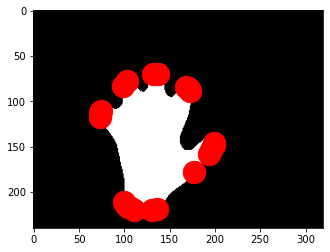

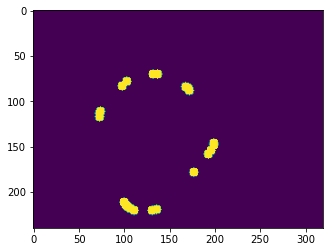

In [106]:
corners = detect_corners(gray_image.astype('uint8'))
# plt.imshow(corners)
plt.imshow(bin_img, 'gray')
plt.scatter(points[hull.vertices,0], points[hull.vertices,1], s=500, c='r')
# plt.plot(np.array([points[hull.vertices,0][-1], points[hull.vertices,0][0]]), 
#          np.array([points[hull.vertices,1][-1], points[hull.vertices,1][0]]), 'r', lw=2)
plt.show()

hull_points = np.zeros(gray_image.shape)

for p1, p2 in zip(points[hull.vertices,0], points[hull.vertices,1]):
#     print(p1,p2)
    hull_points = cv2.circle(hull_points,(p1,p2), 5, 255, -1)
plt.imshow(hull_points)    

In [98]:
# img_copy = np.zeros(img_points.shape)
# img_copy[is_hull_points] = img_points[is_hull_points]
# plt.imshow(img_copy)


[False  True]


IndexError: index 577 is out of bounds for axis 1 with size 320

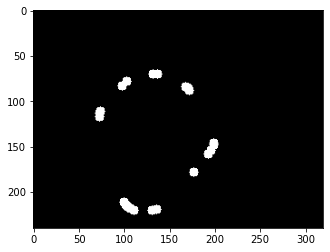

In [107]:
plt.imshow(hull_points, 'gray')
is_hull_points = (hull_points.astype('uint8')/255).astype('bool')
print(np.unique(is_hull_points))
print(is_hull_points[101, 577]) 
# 618 460, 577 101

In [108]:
# # def on_hull(img_points, is_hull_points):
# img_copy = np.zeros(img_points.shape)
# img_copy[is_hull_points] = img_points[is_hull_points]
# plt.imshow(img_copy)

def is_on_hull(point, is_hull_points):
    if is_hull_points[point[1], point[0]]:
        return True
    return False

In [109]:
def finger_triangle(img_points, is_hull_points):
    num_hull = 0
    num_direction_change = 0
    prev_pt = np.array([0,0])
    numLabels = np.max(np.unique(img_points))
#     print(numLabels)
    temp_img = img_points.copy()
    if (numLabels == 0):
        return False
    for i in range(2, np.max(np.unique(img_points)) + np.max(np.unique(img_points)) - 1):
#         print('loop')
        if i == 2:
            rows, cols = np.where(img_points == 1)
            center_x = np.mean(cols).astype('int')
            center_y = np.mean(rows).astype('int')   
            prev_pt1 = np.array([center_x, center_y])

            rows, cols = np.where(img_points == 2)
            center_x = np.mean(cols).astype('int')
            center_y = np.mean(rows).astype('int')   
            prev_pt2 = np.array([center_x, center_y])   

        index = (i % np.max(np.unique(img_points))) + 1
        rows, cols = np.where(img_points == index)
        center_x = np.mean(cols).astype('int')
        center_y = np.mean(rows).astype('int')   
        curr_pt = np.array([center_x, center_y])
        
#         print(curr_pt, prev_pt1)
#         print(is_on_hull( curr_pt, is_hull_points))
#         print(is_on_hull(prev_pt1, is_hull_points))
        if is_on_hull(prev_pt1, is_hull_points):
            num_hull += 1
        
        
#         if is_on_hull( curr_pt, is_hull_points) and is_on_hull(prev_pt1, is_hull_points):
#             return True
        
        ba = curr_pt - prev_pt2
        bc = prev_pt1 - prev_pt2
        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)
#         print(np.degrees(angle)    )
        thres = 20
        if not(np.degrees(angle) > 180 - thres and np.degrees(angle) < 180 + thres):
            num_direction_change += 1

#         temp_img = cv2.line(temp_img, (prev_pt1[0], prev_pt1[1]), 
#                             (prev_pt2[0], prev_pt2[1]), (255,0,0), 2)     
#         plt.imshow(temp_img)
#         plt.show()
        prev_pt1 = prev_pt2 
        prev_pt2 = curr_pt    
#     return False
#     print('nums',num_direction_change, num_hull)
    if (num_direction_change >= 3 and num_hull >= 2):
        return True
    else:
        return False

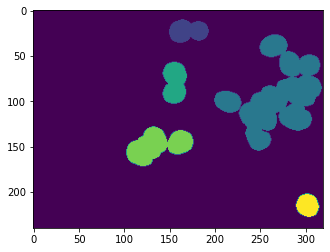

In [110]:
blurred = process_hand(gray_image)
# plt.imshow(blurred)
# plt.show()

img_points = detect_corners(blurred.astype('uint8'))
plt.imshow(img_points)
plt.show()

In [111]:
numTri = 0
for i in np.unique(labeled_img)[1:]:
# for i in [1]:
#     print(i)
    img_tri1 = labeled_img.copy()
    img_tri1 = img_tri1 == i
    img_tri1 = img_tri1.astype('uint8')* 255    
#     plt.imshow(img_tri1)
#     plt.show()
#     blurred = process_triangle(img_tri1)
    img_points = detect_corners(img_tri1)
#     plt.imshow(img_points)
#     plt.show()
    if finger_triangle(img_points, is_hull_points):
        numTri += 1
print('number of fingers is', numTri + 1)

number of fingers is 1
